In [214]:
import os
from pathlib import Path
from collections import defaultdict

from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
text_path = Path('../../derge-kangyur/derge-kangyur-tags/').resolve()

In [12]:
img_path = Path('../output/volumes/')

In [254]:
vol_01_text = text_path/'001-tagged.txt'
vol_01_img = img_path/'vol-1'

vol_02_text = text_path/'002-tagged.txt'
vol_02_img = img_path/'vol-2'

vol_03_text = text_path/'003-tagged.txt'
vol_03_img = img_path/'vol-3'

In [31]:
with open(str(vol_01_text)) as f:
    vol_01_lines = f.readlines()[9:]

In [32]:
with open(str(vol_02_text)) as f:
    vol_02_lines = f.readlines()[9:]

In [255]:
with open(str(vol_03_text)) as f:
    vol_03_lines = f.readlines()[9:]

## preprocessing

In [33]:
vol_01_lines[:32]

['[2a.1]རྩོད་པ་དང་། །དགེ་འདུན་དབྱེན་རྣམས་བསྡུས་པ་ཡིན། །རབ་ཏུ་འབྱུང་བའི་གཞིའི་སྤྱི་སྡོམ་ལ། ཤཱ་རིའི་བུ་དང་མུ་སྟེགས་ཅན། །དགེ་ཚུལ་གཉིས་དང་བྱ་རོག་སྐྲོད། །དགྲ་བཅོམ་བསད་དང་ལག་རྡུམ་གྱི། །སྡེ་ཚན་\n',
 '[2a.2]ཡང་དག་བསྡུས་པ་ཡིན། །སྡོམ་ལ། ཤཱ་རིའི་བུ་དང་རབ་འབྱུང་དང་། །བསྙེན་པར་རྫོགས་པར་གནང་བ་དང་། །ཉེ་སྡེས་ཚོགས་ནི་བསྡུས་པ་དང་། །ལྔ་པའི་སྡེ་ཚན་བསྡུས་པ་ཡིན། །བྱང་ཆུབ་སེམས་དཔའ་དགའ་ལྡན་གྱི་གནས་ན་བཞུགས་པ་ན། \n',
 '[2a.3]ཡུལ་ཨང་ག་དག་ན་ཨང་གའི་རྒྱལ་པོ་ཞེས་བྱ་བས་རྒྱལ་སྲིད་འབྱོར་པ། རྒྱས་པ་བདེ་བ་ལོ་ལེགས་པ་སྐྱེ་བོ་དང་མི་མང་པོས་གང་བ་བྱེད་དུ་བཅུག་གོ། །ཡུལ་མ་ག་དྷཱ་དག་ན་ཡང་རྒྱལ་པོ་པད་མ་ཆེན་པོ་ཞེས་བྱ་བས། རྒྱལ་སྲིད་འབྱོར་པ་རྒྱས་པ་བདེ་བ་ལོ་\n',
 '[2a.4]ལེགས་པ་སྐྱེ་བོ་དང་མི་མང་པོས་གང་བ་བྱེད་དུ་བཅུག་གོ། །རེས་འགའ་ནི་ཨང་གའི་རྒྱལ་པོ་དཔུང་དང་མཐུ་ཆེ་བ་ཡིན་ལ། རེས་འགའ་ནི་རྒྱལ་པོ་པད་མ་ཆེན་པོ་དཔུང་དང་མཐུ་ཆེ་བ་ཡིན་ནོ། །གང་གི་ཚེ་ཨང་གའི་རྒྱལ་པོ་དཔུང་དང་མཐུ་ཆེ་བ་དེའི་ཚེ་\n',
 '[2a.5]ན། དེས་དཔུང་གི་ཚོགས་ཡན་ལག་བཞི་པ། གླང་པོ་ཆེ་པའི་ཚོགས་དང་། རྟ་པའི་ཚོགས་དང་། ཤིང་རྟ་པའི་ཚོགས་དང་། དཔུང་བུ་ཆུང་གི་ཚོགས་གོ་བསྐོན་ཏེ། ཡུལ་མ་ག་དྷཱ་རྒྱལ་པོའི་ཁབ་མ

In [34]:
vol_02_lines[:32]

['[2a.1]མཛེས་པར་བྱས་པ། འོད་འདོམ་གང་གིས་བརྒྱན་པ། ཉི་མ་སྟོང་བས་ལྷག་པའི་འོད་མངའ་བ། རིན་པོ་ཆེའི་རི་བོ་འགྲོ་བ་ལྟ་བུར་ཀུན་ནས་བཟང་བར་མཐོང་ངོ་། །མཐོང་མ་ཐག་ཏུ་ཡང་དེ་རྣམས་བཅོམ་ལྡན་འདས་ལ་སེམས་དང་བ་ཆེན་\n',
 '[2a.2]པོ་སྐྱེས་སོ། །འདི་ནི་ཆོས་ཉིད་ཡིན་ཏེ། ཇི་ལྟར་དགེ་བའི་རྩ་བ་བསགས་པའི་རྒྱུ་ཅན་གྱི་སེམས་ཅན་གྱིས་དང་པོར་སངས་རྒྱས་མཐོང་བ་ལྟར་ལོ་བཅུ་གཉིས་སུ་ཞི་གནས་ཀྱི་སེམས་གོམས་པར་བྱས་པ་དང་། བུ་མེད་པས་བུ་རྙེད་པ་དང་། དབུལ་པོས་གཏེར་\n',
 '[2a.3]མཐོང་བ་དང་། རྒྱལ་སྲིད་ལ་མངོན་པར་དགའ་བ་རྒྱལ་སྲིད་ཀྱི་དབང་བསྐུར་བ་ནི་དེ་ལྟར་ཉམས་དགའ་བ་སྐྱེད་པ་མ་ཡིན་ནོ། །དེ་ནས་བཅོམ་ལྡན་འདས་ཀྱིས་དེ་རྣམས་ཀྱི་གདུལ་བའི་དུས་ལ་གཟིགས་ནས་དགེ་སློང་གི་དགེ་འདུན་གྱི་གུང་ལ་གདན་བཤམས་པ་ཉིད་\n',
 '[2a.4]ལ་བཞུགས་སོ། །དེ་རྣམས་ཀྱིས་ཀྱང་བཅོམ་ལྡན་འདས་ཀྱི་ཞབས་གཉིས་ལ་མགོ་བོས་ཕྱག་བྱས་ཏེ་ཕྱོགས་གཅིག་ཏུ་འཁོད་དོ། །དེ་ནས་བཅོམ་ལྡན་འདས་ཀྱིས་དེ་རྣམས་ཀྱི་བསམ་པ་དང་། བག་ལ་ཉལ་དང་། ཁམས་དང་། རང་བཞིན་མཁྱེན་ནས་ཞེས་\n',
 '[2a.5]བྱ་བ་ནས་རྒྱུན་དུ་ཞུགས་པའི་འབྲས་བུ་མངོན་སུམ་དུ་བྱས་སོ་ཞེས་བྱ་བའི་བར་གོང་མ་བཞིན་དུའོ། །དེ་རྣམས་ཀྱིས་བདེན་པ་མཐོང་ནས་ལན་གསུམ་དུ་ཆེད་དུ་བརྗོད་པས་ཆེད་དུ་བརྗོ

In [312]:
vol_03_lines[3060:3090]

['[193a.6]གཙུག་ལག་ཁང་བརྩིག་ལགས་སོ། །བཅོམ་ལྡན་འདས་ཀྱིས་བཀའ་སྩལ་པ། ཁྱིམ་བདག་དེ་ལྟ་བས་ན་རྗེས་སུ་གནང་གིས་རྩིགས་ཤིག །དེས་ཅི་འདྲ་བ་རྩིག་པ་མ་ཤེས་ནས། བཅོམ་ལྡན་འདས་ཀྱིས་བཀའ་སྩལ་པ། གལ་ཏེ་གནས་ཁང་གསུམ་བརྩིག་ན་དབུས་སུ་དྲི་གཙང་ཁང་\n',
 '[193a.7]བརྩིག་པར་བྱ་ཞིང་། གཡས་གཡོན་དུ་གནས་ཁང་གཉིས་ཏེ། དེ་ལྟར་ན་ངོས་གསུམ་པ་ལ་ནི་གནས་ཁང་དགུའོ། །ངོས་བཞི་པ་ལ་ནི་དྲི་གཙང་ཁང་གི་ཐད་ཀ་དབུས་སུ་སྒོ་གསུམ་གདོད་པར་བྱ་ཞིང་གཡས་གཡོན་དུ་གནས་ཁང་གཉིས་སོ། །དུ་རྩེག་ཏུ་བྱ་བ་མ་ཤེས་ནས་བཅོམ་ལྡན་འདས་\n',
 '[193b]\n',
 '[193b.1]ཀྱིས་བཀའ་སྩལ་པ། དགེ་སློང་རྣམས་ཀྱི་གཙུག་ལག་ཁང་ནི་ལྔ་རྩེག་ཏུ་བྱའོ། །དྲི་གཙང་ཁང་ནི་བདུན་རྩེག་ཏུ་བྱའོ། །སྒོ་ཁང་སྟེང་གི་བསིལ་ཁང་ཡང་བདུན་རྩེག་ཏུ་བྱའོ། །དགེ་སློང་མ་རྣམས་ཀྱི་གཙུག་ལག་ཁང་ནི་སུམ་རྩེག་ཏུ་བྱའོ། །དྲི་གཙང་ཁང་ནི་ལྔ་རྩེག་ཏུ་བྱའོ། །སྒོ་\n',
 '[193b.2]ཁང་སྟེང་གི་བསིལ་ཁང་ཡང་ལྔ་རྩེག་ཏུ་བྱའོ། །དེའི་ཚེ་མཉན་ཡོད་ན་ཁྱིམ་བདག་སྦྱིན་པ་ཞེས་བྱ་བ་ཕྱུག་པ་ནོར་མང་བ་ལོངས་སྤྱོད་ཆེ་བ། ཡོངས་སུ་གཟུང་བ་ཡངས་ཤིང་རྒྱ་ཆེ་བ། རྣམ་ཐོས་ཀྱི་བུའི་ནོར་དང་ལྡན་པ། རྣམ་ཐོས་ཀྱི་བུ་ལ་ནོར་གྱིས་འགྲན་པ་ཞིག་གནས་པ་དེས་རིགས་མཉམ་\n',
 '[193b.3]བ་ལས་ཆུང་མ་བླངས་ཏེ། 

convert page number into image number: start from 2nd page -> 3rd image

In [322]:
_, line = '[195a] \n'.split(']')
line[0], line[-1]

(' ', '\n')

In [147]:
# Removing markup algorithm
string = 'འཚོའི་བར་དུ་རྐང་གཉིས་རྣམས་ཀྱི་མཆོག་སངས་རྒྱས་ལ་སྐྱབས་སུ་(འཆིའོ་,མཆིའོ་)། །འདོད་ཆགས་དང་བྲལ་བ་རྣམས་ཀྱི་མཆོག་ཆོས་ལ་སྐྱབས་སུ་མཆིའོ། །ཚོགས་རྣམས་ཀྱི་མཆོག་དགེ་འདུན་ལ་སྐྱབས་སུ་(འཆིའོ་,མཆིའོ་)། །བདག་ཇི་སྲིད་འཚོའི་བར་དུ་དགེ་བསྙེན་དུ་བཙུན་པས་'
#string = 'འཚོའི་བར་དུ་རྐང་གཉིས་རྣམས་ཀྱི་མཆོག་སངས་རྒྱས་ལ་སྐྱབས་སུ་(འཆིའོ་,མཆིའོ་)། །འདོད་ཆགས་དང་བྲལ་བ་རྣམས་ཀྱི་མཆོག་ཆོས་ལ་སྐྱབས་སུ་མཆིའོ། །ཚོགས་རྣམས་ཀྱི་མཆོག་དགེ་འདུན་ལ་སྐྱབས་སུ་འཆིའོ་། །བདག་ཇི་སྲིད་འཚོའི་བར་དུ་དགེ་བསྙེན་དུ་བཙུན་པས་'

print('Original:', string)
string = string.replace("[", "")
string = string.replace("]", "")
if ',' in string:
    result = []
    sub_line = string.split(',')
    for sub in sub_line:
        sub = sub.replace("(", "")
        idx = sub.find(")")
        if idx != -1:
            sub = sub[idx+1:]
        result.append(sub)
    print('Result:  ', ''.join(result))

Original: འཚོའི་བར་དུ་རྐང་གཉིས་རྣམས་ཀྱི་མཆོག་སངས་རྒྱས་ལ་སྐྱབས་སུ་(འཆིའོ་,མཆིའོ་)། །འདོད་ཆགས་དང་བྲལ་བ་རྣམས་ཀྱི་མཆོག་ཆོས་ལ་སྐྱབས་སུ་མཆིའོ། །ཚོགས་རྣམས་ཀྱི་མཆོག་དགེ་འདུན་ལ་སྐྱབས་སུ་(འཆིའོ་,མཆིའོ་)། །བདག་ཇི་སྲིད་འཚོའི་བར་དུ་དགེ་བསྙེན་དུ་བཙུན་པས་
Result:   འཚོའི་བར་དུ་རྐང་གཉིས་རྣམས་ཀྱི་མཆོག་སངས་རྒྱས་ལ་སྐྱབས་སུ་འཆིའོ་། །འདོད་ཆགས་དང་བྲལ་བ་རྣམས་ཀྱི་མཆོག་ཆོས་ལ་སྐྱབས་སུ་མཆིའོ། །ཚོགས་རྣམས་ཀྱི་མཆོག་དགེ་འདུན་ལ་སྐྱབས་སུ་འཆིའོ་། །བདག་ཇི་སྲིད་འཚོའི་བར་དུ་དགེ་བསྙེན་དུ་བཙུན་པས་


In [344]:
def find_img_num(code):
    pg, _ = code.split('.')
    n = 2*int(pg[:-1])
    if pg[-1] is 'a': n -= 1
    return n

def remove_markup(line):
    line = line.replace("[", "")
    line = line.replace("]", "")
    if ',' in line:
        result = []
        sub_line = line.split(',')
        for sub in sub_line:
            sub = sub.replace("(", "")
            idx = sub.find(")")
            if idx != -1:
                sub = sub[idx+1:]
            result.append(sub)
        return ''.join(result)
    return line

def to_raw_text(line):
    desp, line = line.split(']')
    desp = desp[1:]
    line = line[:-1]
    return remove_markup(line), find_img_num(desp)
    
def is_text_line(line):
    _, line = line.split(']')
    return len(line) > 20

def convert(text):
    images = defaultdict(list)
    
    for line in text:
        if is_text_line(line):
            print(repr(line))
            raw_text, n = to_raw_text(line)
            images[n].append(raw_text)
    return images

In [ ]:
texts = convert(vol_03_lines)

In [326]:
texts

defaultdict(list, {})

Compare with page image

In [286]:
idx = 12

In [287]:
texts[idx]

['རྫོགས་པར་མཛད་ནས། བཻ་བྷི་ཊིང་གིར་ཇི་ཙམ་བཞེད་ཀྱི་བར་དུ་བཞུགས་ནས་བཱ་རཱ་ཎ་སཱི་གང་ན་བ་དེར་རྒྱུ་ཞིང་གཤེགས་ཏེ་རིམ་གྱིས་རྒྱུ་ཞིང་གཤེགས་པ་དང་བཱ་རཱ་ཎ་སཱིར་བྱོན་ཏོ། །རྒྱལ་པོ་ཀྲྀ་ཀཱིས་ཡང་དག་པར་རྫོགས་པའི་སངས་རྒྱས་འོད་སྲུང་ཡུལ་ཀ་ཤི་ནས་',
 'ལྗོངས་རྒྱུ་ཞིང་གཤེགས་པ་དང་བཱ་རཱ་ཎ་སཱིར་གཤེགས་ཏེ། བཱ་རཱ་ཎ་སཱིའི་དྲང་སྲོང་སྨྲ་བ་རི་དགས་ཀྱི་ནགས་ན་བཞུགས་སོ་ཞེས་ཐོས་སོ། །ཐོས་ནས་ཀྱང་ཡང་དག་པར་རྫོགས་པའི་སངས་རྒྱས་འོད་སྲུང་གང་ན་བ་དེར་སོང་སྟེ། ཕྱིན་པ་དང་ཡང་དག་པར་རྫོགས་པའི་',
 'སངས་རྒྱས་འོད་སྲུང་གི་ཞབས་གཉིས་ལ་མགོ་བོས་ཕྱག་བྱས་ཏེ་ཕྱོགས་གཅིག་ཏུ་འདུག་གོ། །ཕྱོགས་གཅིག་ཏུ་འདུག་པ་དང་ཡང་དག་པར་རྫོགས་པའི་སངས་རྒྱས་འོད་སྲུང་གིས་རྒྱལ་པོ་ཀྲྀ་ཀཱི་ལ་ཆོས་དང་ལྡན་པའི་གཏམ་གྱིས་ཡང་དག་པར་སྟོན་པར་མཛད།',
 'ཡང་དག་པར་འཛིན་དུ་འཇུག་པར་མཛད། ཡང་དག་པར་གཟེངས་སྟོད་པར་མཛད། ཡང་དག་པར་རབ་ཏུ་དགའ་བར་མཛད་དེ། རྣམ་གྲངས་དུ་མར་ཆོས་དང་ལྡན་པའི་གཏམ་གྱིས་ཡང་དག་པར་བསྟན། ཡང་དག་པར་འཛིན་དུ་བཅུག །ཡང་དག་པར་གཟེངས་',
 'བསྟོད། ཡང་དག་པར་རབ་ཏུ་དགའ་བར་མཛད་ནས་ཅང་མི་གསུང་ངོ་། །དེ་ནས་རྒྱལ་པོ་ཀྲྀ་ཀཱི་སྟན་ལས་ལངས་ཏེ་བླ་གོས་ཕྲག་པ་གཅིག་ཏུ་གཟར་ནས་པུས་མོ་གཡས་པའི་ལྷ་ང་ས་ལ་བཙུགས་ཏེ། ཡང་དག་པར་

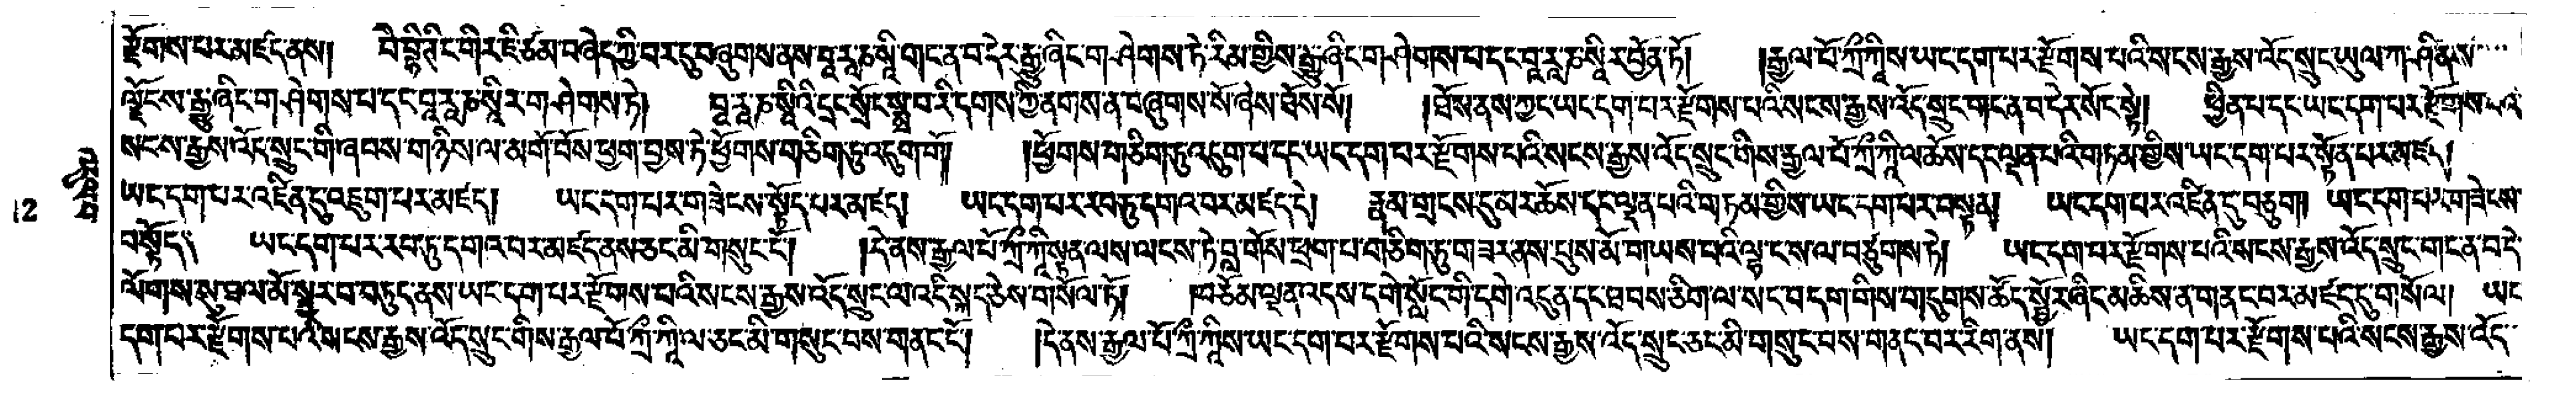

In [288]:
img = Image.open(vol_03_img/'page-{0:03d}.png'.format(idx))
img

select all the good segmentation and its correspoing text label

In [297]:
psegs = sorted([o for o in vol_03_img.iterdir() 
                if o.is_dir() and (len(list(o.iterdir())) == 7 or (o.name == 'page-003' and len(list(o.iterdir())) == 6))])
psegs[:6]

[PosixPath('../output/volumes/vol-3/page-012'),
 PosixPath('../output/volumes/vol-3/page-013'),
 PosixPath('../output/volumes/vol-3/page-014'),
 PosixPath('../output/volumes/vol-3/page-015'),
 PosixPath('../output/volumes/vol-3/page-021'),
 PosixPath('../output/volumes/vol-3/page-022')]

In [298]:
images = defaultdict(list)
for pseg in psegs:
    n = int(pseg.name.split('-')[-1])
    images[n].extend(['/'.join(o.parts[-3:]) for o in sorted(list(pseg.iterdir()))])

Compare line by line

In [299]:
def plot(img, cmap=None):
    plt.figure(figsize=(20,10))
    plt.axis('off')
    plt.imshow(img, cmap=cmap)
    plt.show()

def pseg_plot(text, image):
    for t, i in zip(text, image):
        print(t)
        img = Image.open('../output/volumes/' + i)
        plot(img, cmap='gray')

རྫོགས་པར་མཛད་ནས། བཻ་བྷི་ཊིང་གིར་ཇི་ཙམ་བཞེད་ཀྱི་བར་དུ་བཞུགས་ནས་བཱ་རཱ་ཎ་སཱི་གང་ན་བ་དེར་རྒྱུ་ཞིང་གཤེགས་ཏེ་རིམ་གྱིས་རྒྱུ་ཞིང་གཤེགས་པ་དང་བཱ་རཱ་ཎ་སཱིར་བྱོན་ཏོ། །རྒྱལ་པོ་ཀྲྀ་ཀཱིས་ཡང་དག་པར་རྫོགས་པའི་སངས་རྒྱས་འོད་སྲུང་ཡུལ་ཀ་ཤི་ནས་


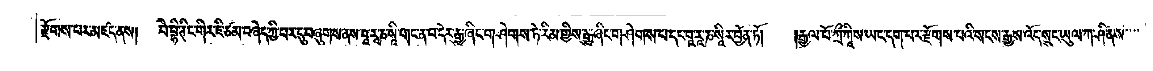

ལྗོངས་རྒྱུ་ཞིང་གཤེགས་པ་དང་བཱ་རཱ་ཎ་སཱིར་གཤེགས་ཏེ། བཱ་རཱ་ཎ་སཱིའི་དྲང་སྲོང་སྨྲ་བ་རི་དགས་ཀྱི་ནགས་ན་བཞུགས་སོ་ཞེས་ཐོས་སོ། །ཐོས་ནས་ཀྱང་ཡང་དག་པར་རྫོགས་པའི་སངས་རྒྱས་འོད་སྲུང་གང་ན་བ་དེར་སོང་སྟེ། ཕྱིན་པ་དང་ཡང་དག་པར་རྫོགས་པའི་


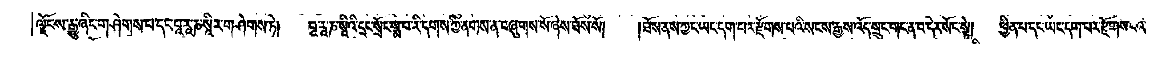

སངས་རྒྱས་འོད་སྲུང་གི་ཞབས་གཉིས་ལ་མགོ་བོས་ཕྱག་བྱས་ཏེ་ཕྱོགས་གཅིག་ཏུ་འདུག་གོ། །ཕྱོགས་གཅིག་ཏུ་འདུག་པ་དང་ཡང་དག་པར་རྫོགས་པའི་སངས་རྒྱས་འོད་སྲུང་གིས་རྒྱལ་པོ་ཀྲྀ་ཀཱི་ལ་ཆོས་དང་ལྡན་པའི་གཏམ་གྱིས་ཡང་དག་པར་སྟོན་པར་མཛད།


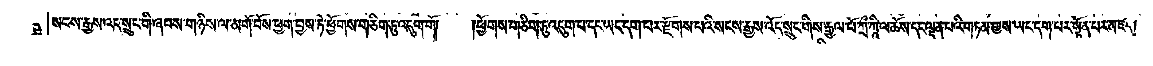

ཡང་དག་པར་འཛིན་དུ་འཇུག་པར་མཛད། ཡང་དག་པར་གཟེངས་སྟོད་པར་མཛད། ཡང་དག་པར་རབ་ཏུ་དགའ་བར་མཛད་དེ། རྣམ་གྲངས་དུ་མར་ཆོས་དང་ལྡན་པའི་གཏམ་གྱིས་ཡང་དག་པར་བསྟན། ཡང་དག་པར་འཛིན་དུ་བཅུག །ཡང་དག་པར་གཟེངས་


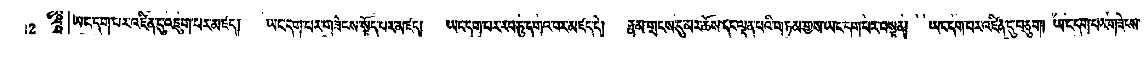

བསྟོད། ཡང་དག་པར་རབ་ཏུ་དགའ་བར་མཛད་ནས་ཅང་མི་གསུང་ངོ་། །དེ་ནས་རྒྱལ་པོ་ཀྲྀ་ཀཱི་སྟན་ལས་ལངས་ཏེ་བླ་གོས་ཕྲག་པ་གཅིག་ཏུ་གཟར་ནས་པུས་མོ་གཡས་པའི་ལྷ་ང་ས་ལ་བཙུགས་ཏེ། ཡང་དག་པར་རྫོགས་པའི་སངས་རྒྱས་འོད་སྲུང་གང་ན་བ་དེ་


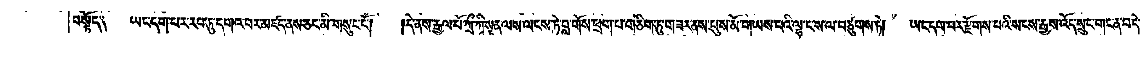

ལོགས་སུ་ཐལ་མོ་སྦྱར་བ་བཏུད་ནས་ཡང་དག་པར་རྫོགས་པའི་སངས་རྒྱས་འོད་སྲུང་ལ་འདི་སྐད་ཅེས་གསོལ་ཏོ། །བཅོམ་ལྡན་འདས་དགེ་སློང་གི་དགེ་འདུན་དང་ཐབས་ཅིག་ལ་སང་བདག་གིས་གདུགས་ཚོད་སྦྱོར་ཞིང་མཆིས་ན་གནང་བར་མཛད་དུ་གསོལ། ཡང་


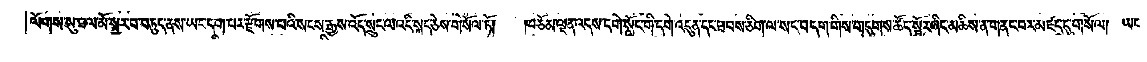

དག་པར་རྫོགས་པའི་སངས་རྒྱས་འོད་སྲུང་གིས་རྒྱལ་པོ་ཀྲྀ་ཀཱི་ལ་ཅང་མི་གསུང་བས་གནང་ངོ་། །དེ་ནས་རྒྱལ་པོ་ཀྲྀ་ཀཱིས་ཡང་དག་པར་རྫོགས་པའི་སངས་རྒྱས་འོད་སྲུང་ཅང་མི་གསུང་བས་གནང་བར་རིག་ནས། ཡང་དག་པར་རྫོགས་པའི་སངས་རྒྱས་འོད་


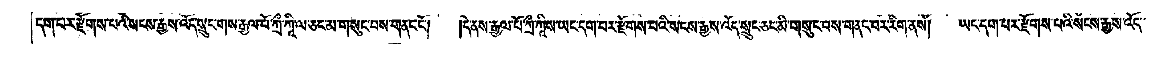

In [300]:
pseg_plot(texts[idx], images[idx])

## Create CSV file with image_filename and label_text 

In [304]:
def create_csv(vol, images, texts):
    all_images, all_texts = [], []
    for k in images:
        if k != 3 and len(texts[k]) == 7:
            all_images.extend(images[k])
            all_texts.extend(texts[k])
    print(len(all_images), len(all_texts))
    df = pd.DataFrame({'filename': all_images, 'text': all_texts})
    df.to_csv(str(img_path/'{}.csv'.format(vol)), index=False)
    return df

In [305]:
data = create_csv('vol-001', images, texts)
data.head()

1631 1631


,filename,text
0,vol-3/page-516/010001.bin.png,ཚད་གཉིས་ལ་བརྟེན་ནས་ཁ་དོག་རྣམ་པ་གཉིས་མངོན་ཏེ། ཁ...
1,vol-3/page-516/010002.bin.png,རྣམས་སྡིག་པ་མི་དགེ་བའི་ཆོས་དེ་དག་ཉིད་བླངས་པའི་...
2,vol-3/page-516/010003.bin.png,བར་གྱུར་ཏོ། །དཔེར་ན་ད་ལྟར་གྱི་མི་རྣམས་ཀྱིས་ཟས་...
3,vol-3/page-516/010004.bin.png,ཤིང་འདུས་ནས་འདི་སྐད་ཅེས་ཀྱི་ཧུད་བྲོ་བ་ཀྱི་ཧུད་...
4,vol-3/page-516/010005.bin.png,བཅུད་དེ་ནུབ་པ་ནས་ཞག་ཁ་དོག་ཕུན་སུམ་ཚོགས་པ། དྲི་...


In [252]:
data.tail()

,filename,text
2598,vol-1/page-619/010003.bin.png,གཽ་ཏ་མ་འདི་ན་མངོན་ཤེས་དྲུག་པོ་ཉིད། །གྲགས་པ་དང་...
2599,vol-1/page-619/010004.bin.png,སྟོབས་དང་བསམ་གཏན་སྟོབས། །རྣམ་པ་དུ་མས་མངོན་ཤེས་...
2600,vol-1/page-619/010005.bin.png,རྣམས་ཀྱི་ནང་ན་འདི་ལྟ་སྟེ་ཡུལ་ཆུ་མིག་ཅན་ན་གནས་པ...
2601,vol-1/page-619/010006.bin.png,བཅབ་པར་གནས་པར་བྱའོ་ཞེས་བཤད་མོད་ཀྱི། འོན་ཀྱང་གྲ...
2602,vol-1/page-619/010007.bin.png,བཅོམ་ལྡན་འདས་ལས་མཉན་ནས་དགེ་སློང་རྣམས་ལ་སྨྲས་པ།...


In [253]:
df = pd.read_csv(str(img_path/'vol-001.csv'))
df.head()

,filename,text
0,vol-1/page-003/010001.bin.png,རྩོད་པ་དང་། །དགེ་འདུན་དབྱེན་རྣམས་བསྡུས་པ་ཡིན། ...
1,vol-1/page-003/010003.bin.png,ཡང་དག་བསྡུས་པ་ཡིན། །སྡོམ་ལ། ཤཱ་རིའི་བུ་དང་རབ་འ...
2,vol-1/page-003/010004.bin.png,ཡུལ་ཨང་ག་དག་ན་ཨང་གའི་རྒྱལ་པོ་ཞེས་བྱ་བས་རྒྱལ་སྲ...
3,vol-1/page-003/010005.bin.png,ལེགས་པ་སྐྱེ་བོ་དང་མི་མང་པོས་གང་བ་བྱེད་དུ་བཅུག་...
4,vol-1/page-003/010006.bin.png,ན། དེས་དཔུང་གི་ཚོགས་ཡན་ལག་བཞི་པ། གླང་པོ་ཆེ་པའི...


validate the dataframe

ཅིག་ནི་མགོར་ཐལ་བའི་བུམ་པ་དག་གིས་བསྣུན། ཁ་ཅིག་ནི་འཕོང་གི་དཔོང་སར་ཁྭ་བཞིན་དུ་ཐག་རིང་པོ་ནས་ཡོངས་སུ་སྤོང་བར་བྱེད། ཁ་ཅིག་ནི་གདུགས་དང་། རྒྱལ་མཚན་དང་། བ་དན་དག་གིས་བསུ་བར་བྱེད། ཁ་ཅིག་ནི་སློབ་མ་ཉིད་དུ་ཁས་ལེན་པར་བྱེད་


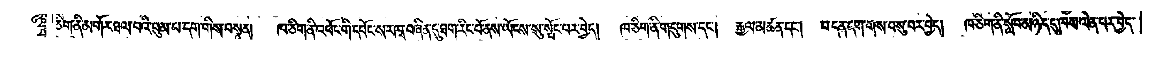

ཅིང་དེ་མཐར་གྱིས་གྲོང་དང་། གྲོང་ཁྱེར་དང་། གྲོང་རྡལ་དང་། དབྱེ་ཚོངས་དང་། ཚོང་རྡལ་དག་ཏུ་རྒོལ་བ་འདུལ་ཞིང་རྒྱལ་པོའི་ཁབ་ཏུ་ཕྱིན་ཏོ། །བྲམ་ཟེ་སྐར་རྒྱལ་གྱིས་བསམས་པ། བདག་གིས་ཅིའི་ཕྱིར་རྩ་བ་སྤངས་ཏེ་ཡལ་ག་དང་། འདབ་མ་དང་། ལོ་མ་


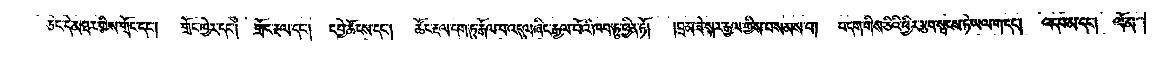

ལ་ཉུག་པར་བྱ། རྒོལ་བ་གང་དག་དང་། མཁས་པར་བགྲང་བ་གང་ཇི་སྙེད་པ་དེ་དག་ཐམས་ཅད་ཀྱང་རྒྱལ་པོ་དང་ཉེ་བ་ཡིན་གྱིས། བདག་ཀྱང་རྒྱལ་པོའི་གན་དུ་འགྲོའོ་སྙམ་ནས་བྲམ་ཟེ་སྐར་རྒྱལ་རྒྱལ་པོ་གཟུགས་ཅན་སྙིང་པོ་ག་ལ་བ་དེར་སོང་སྟེ་ཕྱིན་ནས། རྒྱལ་པོ་གཟུགས་


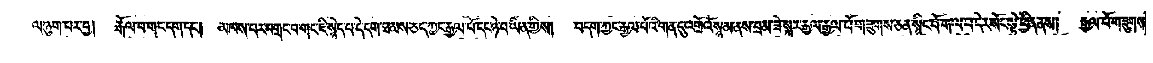

ཅན་སྙིང་པོ་ལ་རྒྱལ་བ་དང་ཚེ་སྤེལ་བ་བྱས་ཏེ་ཕྱོགས་གཅིག་ཏུ་འདུག་གོ། །ཕྱོགས་གཅིག་ཏུ་འདུག་ནས་རྒྱལ་པོ་གཟུགས་ཅན་སྙིང་པོ་ལ་འདི་སྐད་ཅེས་སྨྲས་སོ། །ལྷ་བདག་ལ་བླ་མ་ལས་ཡི་གེ་ཉུང་ཤས་ཤིག་བླངས་པ་མཆིས་ཏེ། དེའི་སླད་དུ་ལྷའི་སྤྱན་སྔར་རྒོལ་བ་དག་དང་ལྷན་


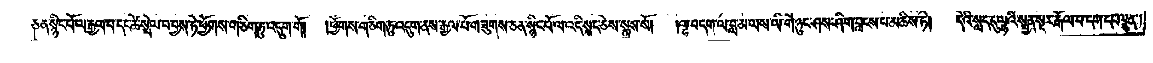

འདུག་གོ། །ཚར་བཅད་པའི་གནས་རྣམས་ཀྱི་ནང་ན་འདི་ལྟ་སྟེ་ལེན་ལ་སྤོབས་པ་མེད་པ་འདི་ནི་ཐ་ཆད་ཡིན་ནོ། །རྒྱལ་པོས་བློན་པོ་རྣམས་ལ་སྨྲས་པ། ཤེས་ལྡན་དག་སུ་རྒྱལ། བྲམ་ཟེ་སྐར་རྒྱལ་རྒྱལ་ལོ། །ཤེས་ལྡན་དག་བྲམ་ཟེ་སྐར་རྒྱལ་ལ་རྒོལ་བའི་ལོངས་སྤྱོད་བྱིན་


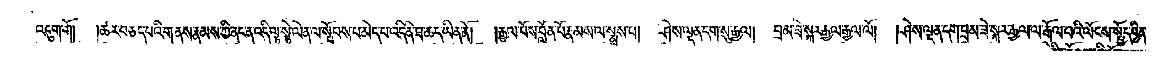

ཅིག །དེ་དག་གིས་སྨྲས་པ། ལྷ་གལ་ཏེ་སྐོལ་གྱིས་རྒོལ་བ་མཆིས་ཤིང་ལྷགས་དགུ་ལ་རྒོལ་བའི་ལོངས་སྤྱོད་སྩལ་བར་གྱུར་ན་རིང་པོ་མི་ཐོགས་པར་སྐོལ་གྱི་ཡུལ་ཨང་ག་དང་མ་ག་དྷཱ་དག་རྒོལ་བའི་ལོངས་སྤྱོད་དུ་འགྱུར་བས། འདི་ལྟར་གྲོང་ན་ལ་ད་འདི་ཉིད་རྒོལ་བའི་ལོངས་


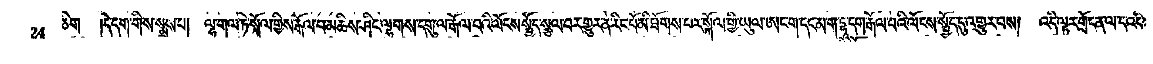

སྤྱོད་ཀྱི་བ་དན་དུ་བགྱིས་ལ་བྲམ་ཟེ་གནས་ལེན་གྱི་བུ་ལས་ཕྲོགས་ཏེ། བྲམ་ཟེ་འདི་ལ་སྩལ་ཅིང་འདི་བས་ཀྱང་ཆེས་རྒྱལ་བ་གཞན་འགའ་ཞིག་མཆིས་ན་ཡང་སྐོལ་གྱིས་དེ་ལ་སྩལ་བར་བགྱིའོ། །རྒྱལ་པོས་སྨྲས་པ། ཤེས་ལྡན་དག་དེ་བཞིན་གྱིས་ཤིག །དེ་དག་གིས་དེ་གནས་


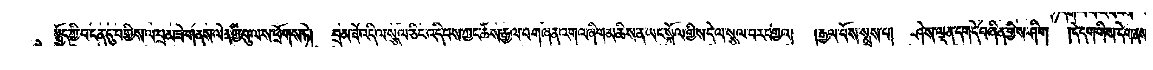

ལེན་གྱི་བུ་ལས་ཕྲོགས་ཏེ་བྲམ་ཟེ་སྐར་རྒྱལ་ལ་བྱིན་ནོ། །གནས་ལེན་གྱི་བུས་བསམས་པ། བདག་གིས་རྒྱལ་པོ་འདི་ལ་ཕན་མང་དུ་བཏགས་ན་རྒྱལ་པོ་འདིས་བདག་རྗེས་སུ་མ་བསྲུངས་ཀྱིས། བདག་གཞན་དུ་འགྲོའོ་སྙམ་ནས་དེས་ཆུང་མ་ལ་སྨྲས་པ། བཟང་མོ་ཁོ་བོས་རྒྱལ་


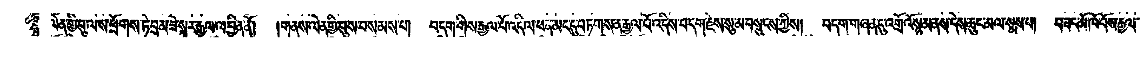

པོ་འདི་ལ་ཕན་མང་དུ་བཏགས་ན་རྒྱལ་པོ་འདིས་ཁོ་བོ་རྗེས་སུ་མ་བསྲུངས་ཀྱིས་ཁོ་བོ་གཞན་དུ་འགྲོས་ཁྱིམ་གྱི་སོ་ནམ་དག་སྡུས་ཤིག །དེས་ཁྱིམ་གྱི་སོ་ནམ་དག་བསྡུ་བར་བརྩམས་པ་དང་། དེའི་ཉེ་དུ་དག་གིས་མཁན་པོ་གནས་ལེན་གྱི་བུ་གཞན་དུ་འགྲོའོ། །ཞེས་ཐོས་ནས་དེ་དག་


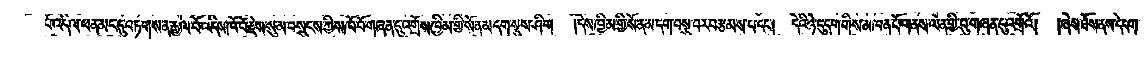

དེའི་གན་དུ་སོང་སྟེ་ཕྱིན་ནས་སྨྲས་པ། མཁན་པོ་ཅིའི་སླད་དུ་ཁྱིམ་གྱི་སོ་ནམ་དག་སྡུད། དེས་སྨྲས་པ། ཤེས་ལྡན་དག་ཁོ་བོས་རྒྱལ་པོ་འདི་ལ་ཕན་མང་དུ་བཏགས་ན་རྒྱལ་པོ་འདིས་ཁོ་བོ་རྗེས་སུ་མ་བསྲུངས་ཀྱིས་ཁོ་བོ་གཞན་དུ་འགྲོའོ། །དེ་དག་གིས་སྨྲས་པ། མཁན་པོ་ཁྱོད་


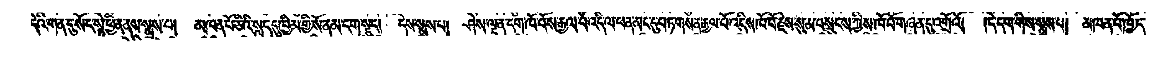

In [243]:
fns = list(data[100:110]['filename'])
txts = list(data[100:110]['text'])

pseg_plot(txts, fns)